In [7]:
import pandas as pd
from PIL import Image
pix = 32
traindf = pd.read_csv("./train.csv")
for index,row in traindf.iterrows():
    img = Image.open("../Train/"+row[0])
    img = img.resize((pix,pix), Image.ANTIALIAS)
    img.save("../Train/"+row[0]) 

In [8]:
testdf = pd.read_csv("./test.csv")
for index , row in testdf.iterrows():
    img = Image.open("../Test/"+row[0])
    img = img.resize((pix,pix), Image.ANTIALIAS)
    img.save("../Test/"+row[0]) 

In [82]:
import torch
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from skimage import io, transform
from PIL import Image
import os
agedict = {'YOUNG':1 , 'MIDDLE' :2 , 'OLD':3}
class IMFDBDataset(Dataset):
    """IMFDB dataset"""

    def __init__(self, csv_file, root_dir, transform=None):
        self.actor_image = pd.read_csv(csv_file)
        self.imgname = self.actor_image.iloc[:,0]
        self.imgage = self.actor_image.iloc[:,1]
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.actor_image.index)

    def __getitem__(self, idx):
        img_name = self.root_dir + "/" + self.imgname[idx]
        image = Image.open(img_name)
        age = agedict[self.imgage[idx]]
        if self.transform:
            image = self.transform(image)
        return image,age

In [86]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
fullset = IMFDBDataset(csv_file='./train.csv',root_dir='../Train',transform = transform)
trainset, testset = torch.utils.data.random_split(fullset, [10000, 9906])

In [87]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,shuffle=True, num_workers=2)

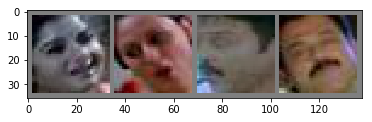

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms, utils
import numpy as np
def imshow(img):
    img = img/2 + 0.5     # unnormalize
    npimg = img.numpy()
    x = np.transpose(npimg, (1, 2, 0))
    plt.imshow(x)

dataiter = iter(trainloader)
images ,label = dataiter.next()
imshow(utils.make_grid(images))